In [1]:
import os
os.chdir('../')

In [2]:
import numpy as np
import argparse
import time
from itertools import chain
import matplotlib.pyplot as plt
import multiprocessing as mp

import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from datasets import inputs
from sr_model.models.models import AnalyticSR, STDP_SR

In [3]:
model_files = [
    'model_0.pt', 'model_1.pt', 'model_2.pt',
    'model_3.pt', 'model_4.pt', 'model_5.pt', 'model_6.pt'
    ]
save_path = './trained_models/quals_fig5_models/'

device = 'cpu'

kernels = []

net = STDP_SR(num_states=16, gamma=0.4)
for model_file in model_files:
    model_path = save_path + model_file
    net.load_state_dict(torch.load(model_path))
    kernels.append(net.ca3.get_stdp_kernel())

net.ca3.reset_trainable_ideal()
kernels.append(net.ca3.get_stdp_kernel())

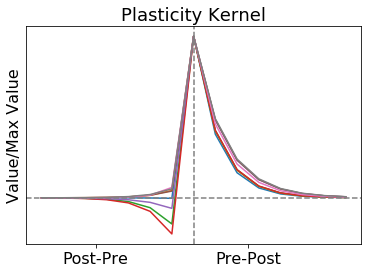

In [4]:
plt.figure()
for kernel in kernels:
    plt.plot(kernel/np.max(kernel))
plt.xticks([])
plt.axvline(7, linestyle='--', color="gray")
plt.axhline(0, linestyle='--', color="gray")
plt.title("Plasticity Kernel", fontsize=18)
plt.ylabel("Value/Max Value", fontsize=16)
plt.xticks([2.5, 9.5], ['Post-Pre', 'Pre-Post'], fontsize=16)
plt.yticks([])
plt.savefig('kernels.png', dpi=300)
plt.savefig('kernels.pdf', dpi=300)
plt.show()

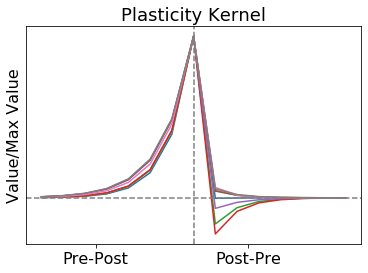

In [4]:
plt.figure()
for kernel in kernels:
    plt.plot(np.flip(kernel/np.max(kernel)))
plt.xticks([])
plt.axvline(7, linestyle='--', color="gray")
plt.axhline(0, linestyle='--', color="gray")
plt.title("Plasticity Kernel", fontsize=18)
plt.ylabel("Value/Max Value", fontsize=16)
plt.xticks([2.5, 9.5], ['Pre-Post', 'Post-Pre'], fontsize=16)
plt.yticks([])
plt.savefig('kernels.png', dpi=300)
plt.savefig('kernels.pdf', dpi=300)
plt.show()